# Analysis for Continuous Improvement

Author Name: Khai Vo

9-digit PID: 730479442

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

### Part 1. Creative Ideation

1. The course should have programming exercises once every two weeks because it will allow students to have more time to solve them on their own instead of constantly going to office hours.
2. The course should have in-person instead of asyncrhonous class on Tuesday so the students will be incentivized to pay more attention to the new learning materials.
3. The course should have a longer individual office hour section because it will be helpful to students, who can have more time processing their thoughts, and for the TAs, who can have more time to come up with a thorough explanation instead of a hasty on.
4. The course should spread out more and have a slower pace because it will help the students find the course less difficult.
5. The course should not have the 3 reading assignments because they are not useful for most students in the class.

### Part 2. Identifying Missing Data

1. The course should have programming exercises once every two weeks because it will allow students to have more time to solve them on their own instead of constantly going to office hours.

2. To support this idea in the future, we just have to ask one more question asking how long it takes for students to complete a programming exercise. We can use that information to find the correlation with how often students go to office hours and see if students rely too much on office hours or just do not have enough time in a week to figure the exercises out on their own.

### Part 3. Choosing Your Analysis

1. The course should spread out more and have a slower pace because it will help the students find the course in general less difficult.

2. This idea is more valuable than the others brainstormed because it can create the widest impact on how the current students view about the class in general. It matters most on how these students would desrcibe the class (not whether they would recommend it or not) to their friends who are considering "trying" this class in the future. At this point in the semester, the class's difficulty is what the current students have already gotten used to, but it might discourage the other students on campus, who don't necessarily want to have programming as their main area of focus, to enroll in the future.


### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [1]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [2]:
DATA_DIRECTORY="../../data"

Next, ... (you take it from here and add additional code and markdown cells to read in the CSV file and process it as needed)

In [3]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

#### Summarize the Data from `survey.csv`
First, I use the function `read_csv_rows` to summarize the entire CSV of data and turned it into a `list` of rows, each row represented as `dict[str, str]`. We would be able to see that there are 620 rows and each row has 35 columns.

In [4]:
from data_utils import read_csv_rows
data_rows: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)
print(f"Data File Read: {SURVEY_DATA_CSV_FILE_PATH}")
print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")
print(f"Columns names: {data_rows[0].keys()}")

Data File Read: ../../data/survey.csv
620 rows
35 columns
Columns names: dict_keys(['row', 'year', 'unc_status', 'comp_major', 'primary_major', 'data_science', 'prereqs', 'prior_exp', 'ap_principles', 'ap_a', 'other_comp', 'prior_time', 'languages', 'hours_online_social', 'hours_online_work', 'lesson_time', 'sync_perf', 'all_sync', 'flipped_class', 'no_hybrid', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend'])


#### Convert Row-oriented Data into Column-oriented Data
Next, I utilize the `columnar` function to transform a table represented as a list of rows (e.g. `list[dict[str, str]]`) into one represented as a dictionary of columns (e.g. `dict[str, list[str]]`). This is helpful because it is easier to conduct analysis or select specific data to focus on using column-oriented data. We can see that now there would be 35 columns, and each column has 620 rows.

In [5]:
from data_utils import columnar
data_cols: dict[str, list[str]] = columnar(data_rows)
print(f"{len(data_cols.keys())} columns")
print(f"{len(data_cols['year'])} rows")
print(f"Columns names: {data_cols.keys()}")

35 columns
620 rows
Columns names: dict_keys(['row', 'year', 'unc_status', 'comp_major', 'primary_major', 'data_science', 'prereqs', 'prior_exp', 'ap_principles', 'ap_a', 'other_comp', 'prior_time', 'languages', 'hours_online_social', 'hours_online_work', 'lesson_time', 'sync_perf', 'all_sync', 'flipped_class', 'no_hybrid', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend'])


#### Using Data from the first 30 students/rows
Now that I have turned the initial data into column-oriented data, I will only use the survey answers from the first 30 students for further sorts and analysis by using `head` function. Since the order of the students submitting this survey is not a variable, choosing the first 30 students are no different from choosing randomly from the data.

In [6]:
from data_utils import head
from tabulate import tabulate
data_cols_head: dict[str, list[str]] = head(data_cols, 30)
tabulate(data_cols_head, data_cols_head.keys(), "html")

row,year,unc_status,comp_major,primary_major,data_science,prereqs,prior_exp,ap_principles,ap_a,other_comp,prior_time,languages,hours_online_social,hours_online_work,lesson_time,sync_perf,all_sync,flipped_class,no_hybrid,own_notes,own_examples,oh_visits,ls_effective,lsqs_effective,programming_effective,qz_effective,oh_effective,tutoring_effective,pace,difficulty,understanding,interesting,valuable,would_recommend
0,22,Returning UNC Student,No,Mathematics,No,"MATH 233, MATH 347, MATH 381",7-12 months,No,No,UNC,1 month or so,"Python, R / Matlab / SAS",3 to 5 hours,0 to 2 hours,6,2,2,1,2,4,4,0,7,3,7,5,,,1,1,7,5,6,5
1,25,Returning UNC Student,No,Mathematics,Yes,"MATH 130, MATH 231, STOR 155",None to less than one month!,,,,,,0 to 2 hours,5 to 10 hours,4,3,3,1,2,6,4,5,5,5,5,5,7,6,6,6,3,4,6,4
2,25,Incoming First-year Student,Yes - BA,Computer Science,No,"MATH 130, MATH 152, MATH 210",None to less than one month!,,,,,,3 to 5 hours,5 to 10 hours,3,3,4,2,1,7,7,2,5,6,7,7,4,,6,4,6,7,7,7
3,24,Returning UNC Student,Yes - BS,Computer Science,Maybe,"MATH 231, MATH 232, STOR 155",2-6 months,No,No,High school course (IB or other),None to less than one month!,Python,3 to 5 hours,3 to 5 hours,5,5,4,3,3,6,5,1,6,3,5,5,5,4,4,4,5,6,6,6
4,25,Incoming First-year Student,Yes - BA,Computer Science,No,MATH 130,None to less than one month!,,,,,,0 to 2 hours,3 to 5 hours,7,3,3,3,2,6,3,5,6,6,6,6,7,3,6,5,5,6,6,7
5,25,Incoming First-year Student,Yes - BS,Computer Science,Maybe,"MATH 129P, MATH 231, MATH 232, STOR 155",2-6 months,No,No,High school course (IB or other),1 month or so,"Python, Java / C#, JavaScript / TypeScript, HTML / CSS",10+ hours,5 to 10 hours,5,2,2,2,1,5,5,0,7,7,7,7,,,4,3,6,7,7,7
6,25,Incoming First-year Student,Yes - BA,Computer Science,Yes,"MATH 129P, MATH 130",2-6 months,Yes,No,High school course (IB or other),7-12 months,"Python, Java / C#, JavaScript / TypeScript, HTML / CSS, Bash",3 to 5 hours,5 to 10 hours,5,3,3,5,3,7,7,2,7,5,7,5,4,4,4,4,6,7,7,7
7,24,Returning UNC Student,Yes - BA,Neuroscience,No,"MATH 130, MATH 152, MATH 231, MATH 232, MATH 233, MATH 381, PSYC 210, STOR 155",None to less than one month!,,,,,,5 to 10 hours,5 to 10 hours,1,2,2,1,1,7,7,0,7,7,7,7,7,,4,4,7,7,7,7
8,25,Incoming First-year Student,Yes - BS,Computer Science,Yes,STOR 120,None to less than one month!,,,,,,0 to 2 hours,10+ hours,1,5,4,6,5,7,7,1,7,7,7,7,7,7,5,4,6,7,7,7
9,22,Returning UNC Student,No,Neuroscience,No,"MATH 130, MATH 231, MATH 232, PSYC 210",None to less than one month!,,,,,,3 to 5 hours,5 to 10 hours,5,2,2,1,1,7,7,2,7,5,7,7,7,,7,4,6,7,7,7


#### Selecting specific Columns that are related to the Analysis 
In these first 30 surveys, I will only look at the 5 columns that I think illustrate objective views of the students on the course through a general scope by using `select` function. I want to see the relationship among different types of opinions and whether the students' prior experience affects how they view the course.


In [7]:
from data_utils import select
selected_data: dict[str, list[str]] = select(data_cols_head, ["row", "prior_exp", "difficulty", "pace", "interesting", "valuable"])
tabulate(selected_data, selected_data.keys(), "html")

row,prior_exp,difficulty,pace,interesting,valuable
0,7-12 months,1,1,5,6
1,None to less than one month!,6,6,4,6
2,None to less than one month!,4,6,7,7
3,2-6 months,4,4,6,6
4,None to less than one month!,5,6,6,6
5,2-6 months,3,4,7,7
6,2-6 months,4,4,7,7
7,None to less than one month!,4,4,7,7
8,None to less than one month!,4,5,7,7
9,None to less than one month!,4,7,7,7


From the data, I can draw a conclusion that all 30 students think the course is `interesting` and `valuable` above average regardless of how much prior experience they have with coding. In terms of `difficulty`, and `pace`, the data vary and I can see a mild correlation between these two attributes. However, the correlation between `prior_exp` and `difficulty` or `pace` is pretty weak. Therefore, I will explore more on the relationship between `difficulty` and `pace` using data of ALL STUDENTS who filled out the surveys in the next step.

#### Graphing the Distribution of the students' opinions on the `Pace` and `Difficulty` of the Course

In this step, I am utilizing the function `count` to count the frequency of each value in the two column `pace` and `difficulty` of the entire dataset (620 students). Then, I use `matplotlib` for the purpose of visualizing the distribution and correlation by graphing the two bar charts

<BarContainer object of 7 artists>

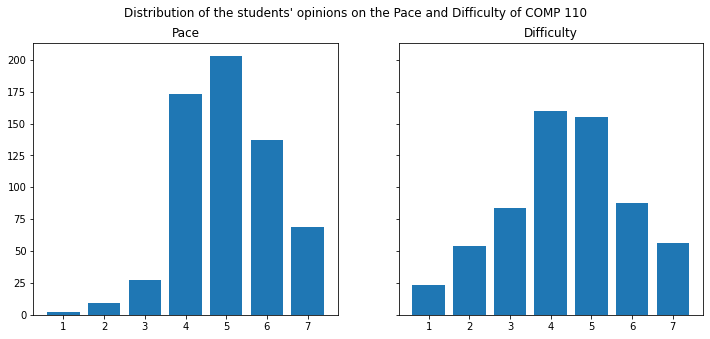

In [8]:
from data_utils import count
pace_counts: dict[str, int] = count(data_cols["pace"])
difficulty_counts: dict[str, int] = count(data_cols["difficulty"])

from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Distribution of the students' opinions on the Pace and Difficulty of COMP 110 ")
axes[0].set_title("Pace")
axes[0].bar(pace_counts.keys(), pace_counts.values())
axes[1].set_title("Difficulty")
axes[1].bar(difficulty_counts.keys(), difficulty_counts.values())

Through these two graphs, we can see that on average, the students think the class is difficult and goes on a fast pace. The data for the `pace` is skewed left, while the data for the `difficulty` seems to follow a normal distribution. The two charts shows a stronger evidence of the class going fast than the class being difficult. Since this is not a correlation graph, it would be hasty to conclude that there is a strong correlation. However, from the shapes of the graphs and personal intuition, I believe that there is a level of correlation betwween these two attributes.

### Part 5. Conclusion



In conlusion, my data analysis results were not very conclusive in the support of my idea due my current inability to create a correlation graph using matplotlib, and in reality whether making the class less fast would significantly reduce the level of difficulty for the majority of the students. It would be helpful if there are additional data collection thorugh having a question like "What do you think makes this class difficult, if you do think it is?" on the survey. From there, it would be easier to see if slowing down the pace of the class would make it less difficult. If we do slow down the class in general, the greatest trade-off would be the impossibility of covering all the materials that this class supposed to in a duration of 1 semester. This class would definitely attracts more students if it is considered less difficult, but at the end of the day, it is subjective. It would only be worth it if slowing down the class, and possibly making it less difficult, does not require a sacrifice of the important materials covered in this class.